Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3

0.0012748241424560547


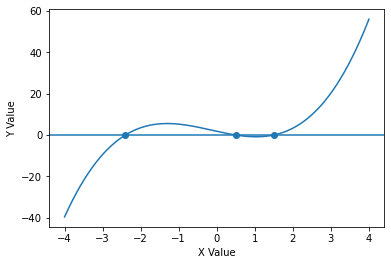

In [1]:
## Part 1A

import numpy as np
import matplotlib.pyplot as plt

import time

# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []

par = np.array([1.80,-4.05,0.4,1.0])

# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

start = time.time()

# Define the size of the "slices" in x in which we will look for roots.
nsearch = 1000

# calculate the number of slices
niter = npoints/nsearch

# use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
ycomp = yval[0]
nroots_found = 0

# loop over the slices
for i in range(0,int(niter)):
    # Begin at the right most data point in the slice
    y = yval[nsearch*i]
    
    # Check to see if we got lucky and landed on an exact zero of the function
    if (y==0):
        print ("Found exact root at x = %f\n" % xval[nsearch*i])
        xroots.append(xval[nsearch*i])
        yroots.append(0.0)
        nroots_found = nroots_found + 1
    # Otherwise, check to see if there is a root in between the left and right comparison points
    if (y*ycomp<0.0):
        # There is a root in the interval, so apply Newton's algorithm / bisection method
        #
        # First, get the x-values of the left and right ends of the slice
        xlow = xval[nsearch*(i-1)]
        xhigh = xval[nsearch*i]
        # define a "tolerance" at which point we will say we have found a zero
        epsilon = 1.48E-8
        
        diff = 1.0E12
        while (diff>epsilon):
            # Calculate the function values at the left, right, and midpoints of the slice
            fa = generator_function(xlow,*par)
            fb = generator_function(xhigh,*par)
            xmid = (xhigh+xlow)/2.0
            fc = generator_function(xmid,*par)
            
            # Decide if the root is in the left half or right half of the interval, and redefine
            # the x interval accordingly
            product = fa*fc
            if (product < 0):
                xhigh = xmid
            else:
                xlow = xmid

            # update the difference value
            diff = np.abs(fc)

        print ("Found root at x = %f\n" % xmid)
        xroots.append(xmid)
        yroots.append(0.0)
        nroots_found = nroots_found + 1
        
        # move to the next slice
        ycomp = y
    else:
        # move to the next slice
        ycomp = y

print ("Total number of roots found = %d\n" % nroots_found)

end = time.time()
print(end - start)
time_ejb = (end-start)

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate 
axs.plot(xval,yval)
axs.scatter(xroots,yroots)
axs.set_ylabel('Y Value')
axs.set_xlabel('X Value')
axs.axhline()
plt.show()

Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3



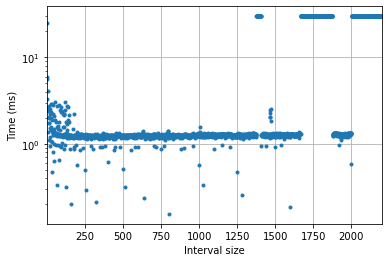

In [20]:
## Part 1B

import numpy as np
import matplotlib.pyplot as plt

import time

# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []
xstep = []
ystep = []

par = np.array([1.80,-4.05,0.4,1.0])

nroots_expected = 3


# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

for nsearch in range(1,int(npoints/2)):
    start = time.time()

    niter = npoints/nsearch
    ycomp = yval[0]
    nroots_found = 0

    for i in range(0,int(niter)):
        y = yval[nsearch*i]
        if (y==0):
            if (nsearch == 1):
                print ("Found exact root at x = %f\n" % xval[nsearch*i])
            nroots_found = nroots_found + 1
        if (y*ycomp<0.0):
            xlow = xval[nsearch*(i-1)]
            xhigh = xval[nsearch*i]
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,*par)
                fb = generator_function(xhigh,*par)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,*par)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (nsearch == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
        else:
            ycomp = y

    if (nsearch == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    
    xstep.append(nsearch)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    else:
        ystep.append(30)
        
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
#plt.xscale('log')
axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Interval size')
axs.axhline()
plt.grid(True)
axs.set_xlim(1,2200)
plt.show()


Part 1C: My Analysis

After modifying the code, specifically by extending the x limits and adjusting the number of original data points, the same pattern as depicted in the normal, unmodified code becomes repeated. Additionally adjusting the plot "xlim" allows for an easier visualization of this pattern. For my understanding purposes it helped to compare the plot above to the first plot in Part 1A. Once this comparison had been made, I printed off the value of "niter" each time the parent loop went through, and found that all three roots were found in the first go through of the loop. I then reset the values back to what they were initially, shortened the x-axis limit, and also shortened the x limits (from -4.0,4.0 to -3.0,3.0) and realized that the gaps between the consistent "30" bars shortened significantly. I went a step further by changing the x limits to -2.4,1.6, and was able to get an "exact root found" message. From all of this, it is to my understanding that, as the interval size gets smaller and smaller, the algorithm is actually able to start locating roots, explaining why the consistent "30" bars extend from the right, i.e. the larger interval sices (meaning fewer slices). After completely resetting all the variables to their intended values (except for the plot's x-axis limit), my concluding understanding is that the "sweet spot" for the interval size, as discussed in class, for this polynomial is between roughly 250 and 1350, as this is when the algorithm is able to find all the roots without sacrificing extensive runtime (which can be seen from roughly 150-interval-size and below).

[-4.     -3.9992 -3.9984 ...  3.9976  3.9984  3.9992]
Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3

0.0013849735260009766


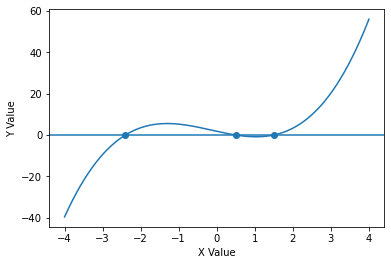

In [30]:
## Part 1D

import numpy as np
import matplotlib.pyplot as plt

import time

# define a generator function for the polynomial
# *******EDITED*******
def generator_function(x,*par):
    full_function = 0
    
    for coef in range(0, len(par)):
        full_function += par[coef]*(x**coef)
        
    return full_function

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints
xroots = []
yroots = []

par = np.array([1.80,-4.05,0.4,1.0])

# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

start = time.time()

# Define the size of the "slices" in x in which we will look for roots.
nsearch = 1000

# calculate the number of slices
niter = npoints/nsearch

# use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
ycomp = yval[0]
nroots_found = 0

# loop over the slices
for i in range(0,int(niter)):
    # Begin at the right most data point in the slice
    y = yval[nsearch*i]
    
    # Check to see if we got lucky and landed on an exact zero of the function
    if (y==0):
        print ("Found exact root at x = %f\n" % xval[nsearch*i])
        xroots.append(xval[nsearch*i])
        yroots.append(0.0)
        nroots_found = nroots_found + 1
    # Otherwise, check to see if there is a root in between the left and right comparison points
    if (y*ycomp<0.0):
        # There is a root in the interval, so apply Newton's algorithm / bisection method
        #
        # First, get the x-values of the left and right ends of the slice
        xlow = xval[nsearch*(i-1)]
        xhigh = xval[nsearch*i]
        # define a "tolerance" at which point we will say we have found a zero
        epsilon = 1.48E-8
        
        diff = 1.0E12
        while (diff>epsilon):
            # Calculate the function values at the left, right, and midpoints of the slice
            fa = generator_function(xlow,*par)
            fb = generator_function(xhigh,*par)
            xmid = (xhigh+xlow)/2.0
            fc = generator_function(xmid,*par)
            
            # Decide if the root is in the left half or right half of the interval, and redefine
            # the x interval accordingly
            product = fa*fc
            if (product < 0):
                xhigh = xmid
            else:
                xlow = xmid

            # update the difference value
            diff = np.abs(fc)

        print ("Found root at x = %f\n" % xmid)
        xroots.append(xmid)
        yroots.append(0.0)
        nroots_found = nroots_found + 1
        
        # move to the next slice
        ycomp = y
    else:
        # move to the next slice
        ycomp = y

print ("Total number of roots found = %d\n" % nroots_found)

end = time.time()
print(end - start)
time_ejb = (end-start)

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate 
axs.plot(xval,yval)
axs.scatter(xroots,yroots)
axs.set_ylabel('Y Value')
axs.set_xlabel('X Value')
axs.axhline()
plt.show()

Part 1D:

I have modified "generator_function" so that, given any array of values representing the coefficients in a function or polynomial, it is able to generate and return a function pertaining to said values. You can see it working exactly the same as Part 1A in the plot above.

# Part 2A:

1.225 kg/m^3 = 0m

Part 2B:

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Read in the data

url = 'https://raw.githubusercontent.com/brash99/phys421/master/JupyterNotebooks/standard_atmosphere.txt'
df = pd.read_csv(url)
df.head(100)

,Altitude,Temperature,Gravity,Pressure,Density,Viscosity
0,-1000,21.50,9.810,11.390000,1.347000,1.821
1,0,15.00,9.807,10.130000,1.225000,1.789
2,1000,8.50,9.804,8.988000,1.112000,1.758
3,2000,2.00,9.801,7.950000,1.007000,1.726
4,3000,-4.49,9.797,7.012000,0.909300,1.694
5,4000,-10.98,9.794,6.166000,0.819400,1.661
6,5000,-17.47,9.791,5.405000,0.736400,1.628
7,6000,-23.96,9.788,4.722000,0.660100,1.595
8,7000,-30.45,9.785,4.111000,0.590000,1.561
9,8000,-36.94,9.782,3.565000,0.525800,1.527


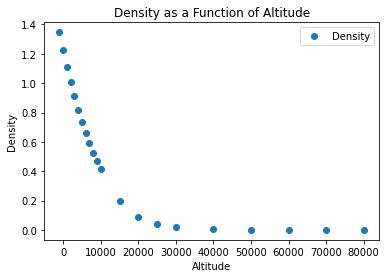

In [16]:
df.plot('Altitude','Density',style='o')
plt.ylabel('Density')
plt.title('Density as a Function of Altitude')
plt.show()

In [30]:
result = sm.ols('Density ~ Altitude',df,).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     29.77
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.90e-05
Time:                        18:09:19   Log-Likelihood:                -2.9699
No. Observations:                  21   AIC:                             9.940
Df Residuals:                      19   BIC:                             12.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7905      0.085      9.285      0.0

In [31]:
yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

0.7905106882449039 -1.4505609151222945e-05 0.6104098703803786


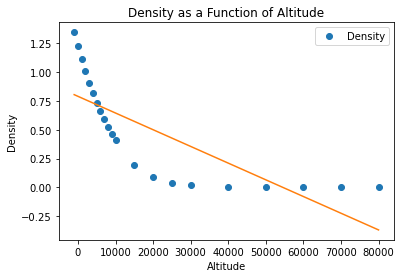

In [32]:
yfit = yint + slope*df['Altitude']
x = df['Altitude']

df.plot('Altitude','Density',style='o')
plt.ylabel('Density')
plt.title('Density as a Function of Altitude')
plt.plot(x,yfit)
plt.show()

# Part 2B and 2C

## A = paramlist[0]
## B = paramlist[1]
## C = paramlist [2]


C:\Users\Alec Souders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Coefficients (from curve_fit)
[ 1.21748509e+00 -1.14109586e-04  6.35491790e-04]
Covariance Matrix (from curve_fit)
[[ 4.85909931e-04  7.01087767e-08 -1.11432706e-05]
 [ 7.01087767e-08  2.60021118e-11 -2.67919169e-09]
 [-1.11432706e-05 -2.67919169e-09  3.49548764e-07]]


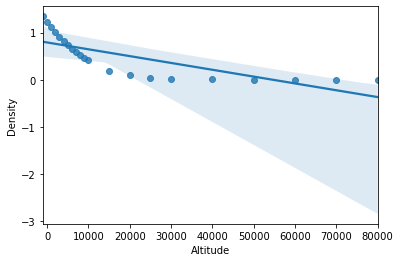

In [84]:
import seaborn as sns
import math
sns.regplot('Altitude', 'Density', df, ci=99.99)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

# *******EDITED**********
def fitfunction(x,*paramlist):
    return (paramlist[0])*pow(math.e,paramlist[1]*x + paramlist[2]*np.sqrt(abs(x)))

init_vals = [0.0 for x in range(3)]
x = np.array(df['Altitude'])
y = np.array(df['Density'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(2.5,5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

# plt.plot(xi,lower)
# plt.plot(xi,upper)
plt.show()

In [79]:
result = sm.ols('Density ~ Altitude',df).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     29.77
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.90e-05
Time:                        19:04:49   Log-Likelihood:                -2.9699
No. Observations:                  21   AIC:                             9.940
Df Residuals:                      19   BIC:                             12.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7905      0.085      9.285      0.0

# Part 2D

0.7905106882449039 -1.4505609151222945e-05 0.6104098703803786


C:\Users\Alec Souders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Coefficients (from curve_fit)
[ 1.21748509e+00 -1.14109586e-04  6.35491790e-04]
Covariance Matrix (from curve_fit)
[[ 4.85909931e-04  7.01087767e-08 -1.11432706e-05]
 [ 7.01087767e-08  2.60021118e-11 -2.67919169e-09]
 [-1.11432706e-05 -2.67919169e-09  3.49548764e-07]]


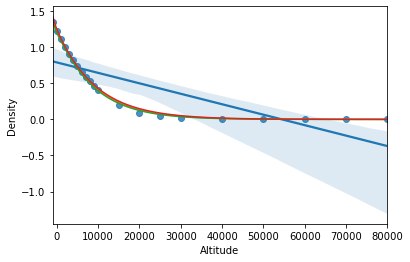

In [85]:
yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

import seaborn as sns
sns.regplot('Altitude', 'Density', df, ci=95)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return (paramlist[0])*pow(math.e,paramlist[1]*x + paramlist[2]*np.sqrt(abs(x)))

init_vals = [0.0 for x in range(3)]
x = np.array(df['Altitude'])
y = np.array(df['Density'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

xi = np.linspace(np.min(x),np.max(x),100)
#xi = np.linspace(2.5,5.0,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

# Part 2D Continued

The fit is extremely accurate with the given data points. I honestly cannot think of a better approach to yield a better fit, aside from trying out other regression equations (polynomial, power, etc.).